# Capstone Project - The Battle of Neighborhoods Part 2 ( Report)

## **Introduction**
In 2019 the conservative government won the general election running on their main manifesto of getting Brexit done. If or when the Brexit process is complete, EU migrants will not have automatc right to come to settle in the UK. As a result of this many EU nationals including EU doctors and Nurses are returning to their countries of origin.Another Key promise of the conservative government during the 2019 general election campaign was to improve the NHS, promising thousands more nurses and doctors. The government aim to attract thousands of foreign nurses and doctors from all over the world especially from commonwealth countries.

## Business Problem
So I have been approached by a marketing company employed by the London NHS trust (Stakeholder) to produce a report about London to help sell the City to potential foreign doctors and nurses who may be considering coming to work in the UK. This marketing material is to help convinced these potential health workers(Target Audience) to choose settling and working in London and also help decide which London Borough to settle.

## The Location
London is the capital and largest city of England and the United Kingdom.Standing on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea, London has been a major settlement for two millennia.London is considered to be one of the world's most important global cities and has been termed the world's most powerful,most desirable,most influential,most visited,most expensive,innovative, sustainable,most investment friendly, and most popular for work city in the world. London exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, healthcare, media, professional services, research and development, tourism and transportation.

London ranks 26 out of 300 major cities for economic performance.It is one of the largest financial centres and has either the fifth or sixth largest metropolitan area GDP.It is the most-visited city as measured by international arrivals and has the busiest city airport system as measured by passenger traffic.It is the leading investment destination hosting more international retailers and ultra high-net-worth individuals than any other city.

## Objectives
I intend to explore London to show what London has got to offer our target audience in terms of venues and show the crime rates of each boroughs.I also intend to explore the various neighbourhoods and Boroughs to help the potential NHS health worker to decide on which neighbourhood he/she will like to settle based on the venues or amenities important to him/her. The stakeholder is willing to provide a good resettlement package which includes taking care of rent for the first three years hence no need to look at rent or housing cost in this project. London has a very developed underground trains and Buses network that link every part of London. Transport for London information pack will be provided to our stakeholders to provide detailed tranport information to enable the target audience get a total view of London.

# Data Section

 ## Data Acquisition and Preprocessing 

### In this project, I will be using the following datasets to help solve my problem:
* The London Burough data was scrapped from London Borough Wikipedia page
* Foursquare and geopy data to list various selected venues that I believe will be important for our target audience.
* The downloaded crime data for London from  https://data.london.gov.uk/dataset/recorded_crime_summary
 
* I will then filter the top 10 most common venue types of each neighborhoods. 
* The target audience will be given the top ten venues of each neighbourhood so they could look at them in determining which neighbourhood to settle
* Neighborhoods or Boroughs will be clustered into different groups based on commom attributes.

## Methodology
* I will mainly rely on Foursquare API to retrieve all venues of each neighborhoods. 
* I will then filter the top 10 most common venue types of each neighborhoods or Borough. 
* The neighborhoods will be then put in different clusters based on similar or common atributes using K-means clustering.
* I will also explore and analyse the crime data and show the crime rate (crime per 1000 people) for each Borough.
* The target audience will be given the top ten venues of each neighbourhood so they could look at them in determining which neighbourhood to settle.
* The target audience will be shown the crime levels of all the boroughs and or neighborhoods.
* To make things easier for our target audience, the Boroughs will be put into clusters or groups based on their venues characteristics like busy, lively and traveller areas.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read crime records data into dataftrame
crime = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
crime.head()

,MajorText,MinorText,LookUp_BoroughName,201801,201802,201803,201804,201805,201806,201807,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,Arson and Criminal Damage,Arson,Barking and Dagenham,2,3,6,3,4,12,6,...,5,5,11,3,5,3,6,9,8,5
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,135,111,115,122,126,123,127,...,138,130,138,113,134,118,109,109,100,114
2,Burglary,Burglary - Business and Community,Barking and Dagenham,38,33,38,36,24,33,30,...,29,27,22,27,31,35,37,30,30,24
3,Burglary,Burglary - Residential,Barking and Dagenham,143,134,122,75,93,77,94,...,99,96,114,96,71,67,80,97,114,131
4,Drug Offences,Drug Trafficking,Barking and Dagenham,4,5,7,3,8,6,9,...,6,4,8,6,7,6,6,9,10,2


In [3]:
# lets check the shape of the data
crime.shape

(1577, 27)

In [4]:
crime.rename(columns={"LookUp_BoroughName": "Borough"}, inplace = True)
crime.head()

,MajorText,MinorText,Borough,201801,201802,201803,201804,201805,201806,201807,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,Arson and Criminal Damage,Arson,Barking and Dagenham,2,3,6,3,4,12,6,...,5,5,11,3,5,3,6,9,8,5
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,135,111,115,122,126,123,127,...,138,130,138,113,134,118,109,109,100,114
2,Burglary,Burglary - Business and Community,Barking and Dagenham,38,33,38,36,24,33,30,...,29,27,22,27,31,35,37,30,30,24
3,Burglary,Burglary - Residential,Barking and Dagenham,143,134,122,75,93,77,94,...,99,96,114,96,71,67,80,97,114,131
4,Drug Offences,Drug Trafficking,Barking and Dagenham,4,5,7,3,8,6,9,...,6,4,8,6,7,6,6,9,10,2


In [5]:
# Names of Boroughs
crime['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [6]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,Borough,Sum,201801,201802,201803,201804,201805,201806,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,Arson and Criminal Damage,Arson,Barking and Dagenham,125,2,3,6,3,4,12,...,5,5,11,3,5,3,6,9,8,5
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2818,135,111,115,122,126,123,...,138,130,138,113,134,118,109,109,100,114
2,Burglary,Burglary - Business and Community,Barking and Dagenham,748,38,33,38,36,24,33,...,29,27,22,27,31,35,37,30,30,24
3,Burglary,Burglary - Residential,Barking and Dagenham,2472,143,134,122,75,93,77,...,99,96,114,96,71,67,80,97,114,131
4,Drug Offences,Drug Trafficking,Barking and Dagenham,145,4,5,7,3,8,6,...,6,4,8,6,7,6,6,9,10,2


In [7]:
# Drop unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)
crime.head()

,Borough,Sum
0,Barking and Dagenham,125
1,Barking and Dagenham,2818
2,Barking and Dagenham,748
3,Barking and Dagenham,2472
4,Barking and Dagenham,145


In [8]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['Borough'], as_index=False).sum()
crime.head()

,Borough,Sum
0,Barking and Dagenham,38442
1,Barnet,59676
2,Bexley,33337
3,Brent,60992
4,Bromley,48224


In [9]:
# Change the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAvg'}, inplace=True)
crime.head()

,Borough,MonthlyAvg
0,Barking and Dagenham,1601.750000
1,Barnet,2486.500000
2,Bexley,1389.041667
3,Brent,2541.333333
4,Bromley,2009.333333


In [10]:
# Explore the clean dataset - borough with least incidents?
crime.sort_values(by='MonthlyAvg', ascending=True).head()

,Borough,MonthlyAvg
22,London Heathrow and London City Airports,288.750000
19,Kingston upon Thames,1064.291667
26,Richmond upon Thames,1065.541667
28,Sutton,1082.541667
23,Merton,1178.458333


### Obtaining London Boroughs information data

This information on London boroughs will be made up of their population & coordinates
-Population can be used to calcuate the ratio of reported crime to population for better comparison.
-Coordinates can be used to get neighborhood data from Foursquare.
source: Wikipedia

In [11]:
import requests
import lxml
from bs4 import BeautifulSoup

In [12]:
# scrapping data about London Boroughs from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xh3TJQpAME0AADAJam0AAAAS","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":931680068,"wgRevisionId":931680068,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015

In [13]:
Borough = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        Borough.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [14]:
# Form a dataframe
dict = {'Borough' : Borough,
       'Population' : Population,
       'Coordinates': Coordinates}
londata = pd.DataFrame.from_dict(dict)
londata.head()

,Borough,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [15]:
# Strip unwanted texts
londata['Borough'] = londata['Borough'].map(lambda x: x.rstrip(']'))
londata['Borough'] = londata['Borough'].map(lambda x: x.rstrip('1234567890.'))
londata['Borough'] = londata['Borough'].str.replace('note','')
londata['Borough'] = londata['Borough'].map(lambda x: x.rstrip(' ['))
londata.head()

,Borough,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [16]:
# Clean coordinates
londata[['Coordinates1','Coordinates2', 'Coordinates3']] = londata['Coordinates'].str.split('/',expand=True)
londata.head()

,Borough,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [17]:
londata.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
londata[['Latitude','Longitude']] = londata['Coordinates3'].str.split(';',expand=True)
londata.head()

,Borough,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [18]:
londata.drop(labels=['Coordinates3'], axis=1,inplace = True)
londata['Latitude'] = londata['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
londata['Latitude'] = londata['Latitude'].map(lambda x: x.lstrip())
londata['Longitude'] = londata['Longitude'].map(lambda x: x.rstrip(')'))
londata['Longitude'] = londata['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
londata['Longitude'] = londata['Longitude'].map(lambda x: x.rstrip(' ('))
londata['Longitude'] = londata['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
londata['Longitude'] = londata['Longitude'].map(lambda x: x.lstrip())
londata['Population'] = londata['Population'].str.replace(',','')
londata.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [19]:

londata['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

### Using Foursquare API to find venues in the Boroughs

List of top 50 popular places in the neighborhood
source: Foursquare
url: https://api.foursquare.com

In [20]:
# foursquare credentials
CLIENT_ID = 'IWJZGX0SK2QNPKXNGD5C1OA32Y5Z2MGSIIQ24RYOSIYN3L4Z' # my Foursquare ID
CLIENT_SECRET = 'AYTGMIRYRMDEFSWQQ4RKKPY0P2YAA2GQCWGLMGMLGDHGWKXM' # my Foursquare Secret  
VERSION = '20190101'
LIMIT = 50
radius = 500

In [21]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=londata['Borough'],
                                   latitudes=londata['Latitude'],
                                   longitudes=londata['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [23]:
print(venues.shape)
venues.head()

(1146, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
2,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
3,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
4,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket


In [24]:
# take a look at crime data
crime.head()

,Borough,MonthlyAvg
0,Barking and Dagenham,1601.750000
1,Barnet,2486.500000
2,Bexley,1389.041667
3,Brent,2541.333333
4,Bromley,2009.333333


In [25]:
# take a look at londata data
londata.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [26]:
venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
2,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
3,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
4,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket


In [27]:
#Combine crime data and borough information data
df = pd.merge(crime,londata, how='outer', on='Borough')
df.head()

,Borough,MonthlyAvg,Population,Latitude,Longitude
0,Barking and Dagenham,1601.750000,194352,51.5607,0.1557
1,Barnet,2486.500000,369088,51.6252,-0.1517
2,Bexley,1389.041667,236687,51.4549,0.1505
3,Brent,2541.333333,317264,51.5588,-0.2817
4,Bromley,2009.333333,317899,51.4039,0.0198


In [28]:
# find out about data type of df
df.dtypes

Borough        object
MonthlyAvg    float64
Population     object
Latitude       object
Longitude      object
dtype: object

In [29]:
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

Borough        object
MonthlyAvg    float64
Population    float64
Latitude      float64
Longitude     float64
dtype: object

In [30]:
#Create a column of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAvg'] / df['Population'] * 1000
df


,Borough,MonthlyAvg,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,1601.750000,194352.0,51.5607,0.1557,8.241490
1,Barnet,2486.500000,369088.0,51.6252,-0.1517,6.736876
2,Bexley,1389.041667,236687.0,51.4549,0.1505,5.868686
3,Brent,2541.333333,317264.0,51.5588,-0.2817,8.010153
4,Bromley,2009.333333,317899.0,51.4039,0.0198,6.320666
5,Camden,3133.208333,229719.0,51.5290,-0.1255,13.639309
6,Croydon,2692.958333,372752.0,51.3714,-0.0977,7.224531
7,Ealing,2496.041667,342494.0,51.5130,-0.3089,7.287841
8,Enfield,2429.541667,320524.0,51.6538,-0.0799,7.579906
9,Greenwich,2267.666667,264008.0,51.4892,0.0648,8.589386


In [45]:
import matplotlib.pyplot as plt

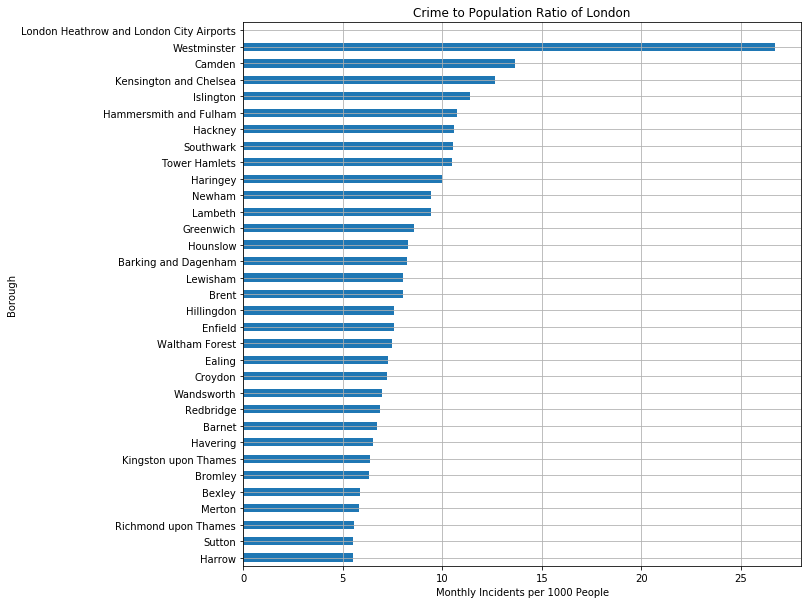

In [46]:
#Visualize crime per 1000 people
df.set_index('Borough')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

### Cluster Analysis
In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.

In [66]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 177 uniques categories.


In [67]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [68]:
# Add borough name back to dataframe
NewBorough = venues['Borough']
onehot.insert(0, 'Borough', NewBorough)
onehot.head()

,Borough,African Restaurant,Airport,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('Borough').mean().reset_index()
grouped.head()

,Borough,African Restaurant,Airport,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Barnet,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.035714,0.0,0.035714,0.0,0.0,0.0,0.0,0.0
3,Brent,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.020,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Bromley,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.025,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [70]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['Borough']:
    print("----"+hood+"----")
    temp = grouped[grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0                  Pool  0.14
1  Gym / Fitness Center  0.14
2           Bus Station  0.14
3           Supermarket  0.14
4           Golf Course  0.14


----Barnet----
                venue  freq
0                Café  0.50
1            Bus Stop  0.25
2    Business Service  0.25
3  African Restaurant  0.00
4         Outlet Mall  0.00


----Bexley----
                  venue  freq
0                   Pub  0.11
1           Coffee Shop  0.11
2        Clothing Store  0.11
3           Supermarket  0.07
4  Fast Food Restaurant  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2       Clothing Store  0.08
3  Sporting Goods Shop  0.06
4        Grocery Store  0.06


----Bromley----
                  venue  freq
0        Clothing Store  0.12
1           Coffee Shop  0.12
2          Burger Joint  0.05
3           Pizza Place  0.05
4  Gym / Fitness Center  0.05


----Camden----
    

In [71]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Borough'] = grouped['Borough']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Martial Arts Dojo,Pool,Bus Station,Park,Supermarket,Gym / Fitness Center,Golf Course,Yoga Studio,Fish & Chips Shop,Field
1,Barnet,Café,Bus Stop,Business Service,Yoga Studio,French Restaurant,Flea Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant
2,Bexley,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket,Fast Food Restaurant,Pharmacy,Portuguese Restaurant,Bakery,Hotel
3,Brent,Coffee Shop,Hotel,Clothing Store,Sporting Goods Shop,Grocery Store,American Restaurant,Sandwich Place,Multiplex,Bubble Tea Shop,Burger Joint
4,Bromley,Clothing Store,Coffee Shop,Bar,Burger Joint,Pizza Place,Gym / Fitness Center,Furniture / Home Store,Burrito Place,Sandwich Place,Café


In [72]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [73]:
kclusters = 5
london_cluster = grouped.drop('Borough', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]

array([3, 2, 3, 1, 3, 1, 3, 3, 3, 3], dtype=int32)

In [74]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_whole = df
london_whole = london_whole.join(venues_sorted.set_index('Borough'), on='Borough')

london_whole.head()

,Borough,MonthlyAvg,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1601.750000,194352.0,51.5607,0.1557,8.241490,3.0,Martial Arts Dojo,Pool,Bus Station,Park,Supermarket,Gym / Fitness Center,Golf Course,Yoga Studio,Fish & Chips Shop,Field
1,Barnet,2486.500000,369088.0,51.6252,-0.1517,6.736876,2.0,Café,Bus Stop,Business Service,Yoga Studio,French Restaurant,Flea Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant
2,Bexley,1389.041667,236687.0,51.4549,0.1505,5.868686,3.0,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket,Fast Food Restaurant,Pharmacy,Portuguese Restaurant,Bakery,Hotel
3,Brent,2541.333333,317264.0,51.5588,-0.2817,8.010153,1.0,Coffee Shop,Hotel,Clothing Store,Sporting Goods Shop,Grocery Store,American Restaurant,Sandwich Place,Multiplex,Bubble Tea Shop,Burger Joint
4,Bromley,2009.333333,317899.0,51.4039,0.0198,6.320666,3.0,Clothing Store,Coffee Shop,Bar,Burger Joint,Pizza Place,Gym / Fitness Center,Furniture / Home Store,Burrito Place,Sandwich Place,Café


In [75]:
! pip install folium

In [76]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_whole['Latitude'], london_whole['Longitude'], london_whole['Borough'], london_whole['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.show()

NameError: name 'folium' is not defined

### Now let's observe each clusters and name them according to their characteristics

In [77]:
# Cluster 0: Healthy area
london_whole.loc[london_whole['Cluster Labels'] == 0, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

,Borough,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,8.291668,0.0,Bed & Breakfast,Park,Metro Station,Chinese Restaurant,Café,Yoga Studio,Flea Market,Fish Market,Fish & Chips Shop,Field


In [62]:
 # Cluster 1: Lively area (Hotels, Restaurants)
london_whole.loc[london_whole['Cluster Labels'] == 1, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

,Borough,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,8.010153,1.0,Coffee Shop,Hotel,Clothing Store,Sporting Goods Shop,Grocery Store,American Restaurant,Sandwich Place,Multiplex,Bubble Tea Shop,Burger Joint
5,Camden,13.639309,1.0,Hotel,Café,Coffee Shop,Italian Restaurant,Hotel Bar,Pizza Place,Train Station,Breakfast Spot,Bakery,Modern European Restaurant
12,Haringey,9.998317,1.0,Café,Fast Food Restaurant,Italian Restaurant,Pharmacy,Sandwich Place,Pub,Portuguese Restaurant,Hotel Bar,Convenience Store,Park
18,Kensington and Chelsea,12.621524,1.0,Café,Gym / Fitness Center,English Restaurant,Burger Joint,French Restaurant,Bakery,Juice Bar,Clothing Store,Restaurant,Modern European Restaurant
20,Lambeth,9.416575,1.0,Caribbean Restaurant,Market,BBQ Joint,Beer Bar,Pub,Tapas Restaurant,Restaurant,Burger Joint,Indian Restaurant,Cocktail Bar
23,Merton,5.798843,1.0,Italian Restaurant,Supermarket,Park,Café,Bakery,Sandwich Place,Fast Food Restaurant,Garden Center,Burger Joint,Bar
27,Southwark,10.535330,1.0,Coffee Shop,Pub,Hotel,Art Gallery,English Restaurant,Hotel Bar,Bar,Theater,Gym / Fitness Center,Shopping Mall
29,Tower Hamlets,10.505301,1.0,Italian Restaurant,Pizza Place,Hotel,Coffee Shop,Gym / Fitness Center,Outdoor Sculpture,Chinese Restaurant,Grocery Store,Steakhouse,Asian Restaurant
32,Westminster,26.677644,1.0,Hotel,Coffee Shop,Sandwich Place,Theater,Hotel Bar,Juice Bar,Sushi Restaurant,Sporting Goods Shop,Italian Restaurant,Restaurant


In [63]:
# Cluster 2: Business area (Coffee shops,Markets,Business services)
london_whole.loc[london_whole['Cluster Labels'] == 2, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

,Borough,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,6.736876,2.0,Café,Bus Stop,Business Service,Yoga Studio,French Restaurant,Flea Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant


In [64]:
# Cluster 3:Busy/ lively area
london_whole.loc[london_whole['Cluster Labels'] == 3, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

,Borough,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,8.241490,3.0,Martial Arts Dojo,Pool,Bus Station,Park,Supermarket,Gym / Fitness Center,Golf Course,Yoga Studio,Fish & Chips Shop,Field
2,Bexley,5.868686,3.0,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket,Fast Food Restaurant,Pharmacy,Portuguese Restaurant,Bakery,Hotel
4,Bromley,6.320666,3.0,Clothing Store,Coffee Shop,Bar,Burger Joint,Pizza Place,Gym / Fitness Center,Furniture / Home Store,Burrito Place,Sandwich Place,Café
6,Croydon,7.224531,3.0,Pub,Coffee Shop,Indian Restaurant,Gym / Fitness Center,Asian Restaurant,Portuguese Restaurant,Italian Restaurant,Brewery,Burger Joint,Burrito Place
7,Ealing,7.287841,3.0,Coffee Shop,Italian Restaurant,Hotel,Vietnamese Restaurant,Park,Burger Joint,Pub,Pizza Place,Bar,Portuguese Restaurant
8,Enfield,7.579906,3.0,Coffee Shop,Clothing Store,Pharmacy,Department Store,Shopping Mall,Sandwich Place,Restaurant,Pub,Supermarket,Optical Shop
9,Greenwich,8.589386,3.0,Supermarket,Coffee Shop,Clothing Store,Pub,Plaza,Grocery Store,Fast Food Restaurant,Discount Store,Sandwich Place,African Restaurant
10,Hackney,10.583614,3.0,Pub,Café,Coffee Shop,Cocktail Bar,Bakery,Brewery,Hotel,Vietnamese Restaurant,Clothing Store,Grocery Store
11,Hammersmith and Fulham,10.717650,3.0,Pub,Indian Restaurant,Italian Restaurant,Gastropub,Café,Japanese Restaurant,Clothing Store,German Restaurant,Portuguese Restaurant,Polish Restaurant
13,Harrow,5.517274,3.0,Indian Restaurant,Supermarket,Convenience Store,Indie Movie Theater,Coffee Shop,Platform,Hobby Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [65]:
# Cluster 4: Traveller orTourist area
london_whole.loc[london_whole['Cluster Labels'] == 4, london_whole.columns[[0] + list(range(5, london_whole.shape[1]))]]

,Borough,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Newham,9.427102,4.0,Hotel,Light Rail Station,Pharmacy,Sandwich Place,Rafting,Chinese Restaurant,Airport,Airport Service,Dance Studio,Dumpling Restaurant


### Results Section


Results 
### Cluster 0 
As can be seen from the Cluster 0 (Healthy area) table, there is only one Borough which is Hounslow in this Cluster. The most common venue in Hounslow is the metro station followed by café and the park. There is a yoga studio within the top ten common venues and the crime rate is relatively low at 8.3.  Based on the most common venues in this cluster, this cluster could be described as a quite area and healthy. 
### Cluster 1 
Some of the Boroughs found in cluster 1 include Camden, Kensington and Chelsea, Westminster and Haringey.  Common venues in this cluster include various kinds of restaurants, gym/fitness centres, coffee shops, pubs and grocery shops. This cluster can be seen as a cluster of Boroughs with lots of lively venues hence this cluster could be described as a lively area.  There is a massive difference between the crime rates in this cluster with crime rates ranging from 5.7 in Merton to 26.7 in Westminster. 
### Cluster 2
Like cluster 0, there is only one Borough found in Cluster 2. Popular venues includes cafe, business service area, flea and fish markets. The crime rate is among the lowest in London at 6.7. There seem to be lots of business and trading activities taken place in this borough hence describing this cluster as a business area
### Cluster 3 
Cluster 3 is made up of are Bexley, Barking and Dagenham, Brent, Bromley and Croydon Boroughs just to mention a few. Cluster 3 is the largest Cluster which is made up of 20 Boroughs.  The common venues in this cluster include coffee shops, different types of restaurants, clothing store, bars and hotels. The crime rate range is not as wide as that for cluster 2, ranging from 5.5 in Sutton and Richmond up Thames and 11.4 in Islington. It is safe to say that this cluster is fairly safe as the crime rate of 11.4 in Islington is half the crime rate of Westminster in cluster 2. Like Cluster 2, based on the common venues found in this Cluster, Cluster 3 could also be described as a lively area. 
### Cluster 4 
The only Borough in this cluster with a crime rate of 9.4 is Newham. The most popular venues in Newham include hotels, airport services, duty free shop, light rail station and an airport. It can be deduce that Newham is near a London airport. 
The venues obtained from exploring  the data for London Boroughs, shows how lively and busy the city is as majority of the Borough explored showed lots of lively and busy venues. When it comes to crime rates in the City, It could be very high in Westminster and low in Merton and Sutton   

### Discussion Section
At the end of this project, London Boroughs have been explored by using Foursquare API to give  a sort of picture about how each Borough looks like in terms of the types and number of venues that exist in that Borough. Although the decision to settle down in a particular location will not ultimately depend on how busy or how many restuarants or cinemas a particular neighborhood has but on other factors like, transport links, number of schools, types of schools etc. 
Information about transportation and its links can easily be found on the transport for london website https://tfl.gov.uk/ and information about schools can also be found at the offsted website https://www.gov.uk/government/organisations/ofsted . Any other information about London and United kingdom as whole can easily be found at the direct gov website https://www.gov.uk/.

Ultimately it depends on what our target audience finds important that will direct him/her towards a particular borough or place of settlement. If an individual is highly into fitness then it will be extremely likely than such an individual would like to settle in a neighborhood in cluster 0 (healthy area) and his/her attitude toward crime level will also play a role in determining which neighborhood he/she settles in. On the other hand if an individual has got children and would like to settle in a family friendly location, then Neighborhoods in Cluster 3(quite area) with the lowest crime rate will appeal to such individual.

The objective of my task was not to choose a Neighborhood or Borough in London for my target audience but rather show them what different parts of London has to offer and depending on their taste, they choose where to settle after making the decision to move to London.